In [2]:
# ! pip install us
# ! pip install calmap
# ! pip install pycountry_convert
# ! pip install plotly 

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates



import plotly.express as px
import plotly.graph_objs as go

from plotly.subplots import make_subplots

# Loading and reading Datasets

In [8]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df

Province/State      Country/Region        Lat       Long  1/22/20  \
0              NaN         Afghanistan  33.939110  67.709953        0   
1              NaN             Albania  41.153300  20.168300        0   
2              NaN             Algeria  28.033900   1.659600        0   
3              NaN             Andorra  42.506300   1.521800        0   
4              NaN              Angola -11.202700  17.873900        0   
..             ...                 ...        ...        ...      ...   
261            NaN  West Bank and Gaza  31.952200  35.233200        0   
262            NaN      Western Sahara  24.215500 -12.885800        0   
263            NaN               Yemen  15.552727  48.516388        0   
264            NaN              Zambia -13.133897  27.849332        0   
265            NaN            Zimbabwe -19.015438  29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  \
0          0        0        0        0        0  ...    38641    38716   
1          0        0        0        0        0  ...    11185    11353   
2          0        0        0        0        0  ...    48007    48254   
3          0        0        0        0        0  ...     1344     1344   
4          0        0        0        0        0  ...     3335     3388   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261        0        0        0        0        0  ...    29906    30574   
262        0        0        0        0        0  ...       10       10   
263        0        0        0        0        0  ...     2009     2011   
264        0        0        0        0        0  ...    13466    13539   
265        0        0        0        0        0  ...     7508     7526   

     9/14/20  9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0      38772    38815    38855    38872    38883    38919    39044    39074  
1      11520    11672    11816    11948    12073    12226    12385    12535  
2      48496    48734    48966    49194    49413    49623    49826    50023  
3       1438     1438     1483     1483     1564     1564     1564     1681  
4       3439     3569     3675     3789     3848     3901     3991     4117  
..       ...      ...      ...      ...      ...      ...      ...      ...  
261    31362    32250    33006    33843    34401    35003    35686    36151  
262       10       10       10       10       10       10       10       10  
263     2013     2016     2019     2022     2024     2026     2026     2028  
264    13720    13819    13887    13928    14022    14070    14131    14175  
265     7531     7576     7598     7633     7647     7672     7683     7683  

[266 rows x 248 columns]

In [9]:
death_df = pd.read_csv("time_series_covid19_deaths_global.csv")
death_df.head(5)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...     1420     1420     1425   
1        0        0        0        0  ...      330      334      338   
2        0        0        0        0  ...     1605     1612     1620   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...      132      134      136   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0     1426     1436     1436     1437     1437     1441     1444  
1      340      343      347      353      358      362      364  
2     1632     1645     1654     1659     1665     1672     1679  
3       53       53       53       53       53       53       53  
4      139      143      144      147      147      152      154  

[5 rows x 248 columns]

In [10]:
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_df.head(5)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...    31234    31638    32073   
1        0        0        0        0  ...     6494     6569     6615   
2        0        0        0        0  ...    33875    34037    34204   
3        0        0        0        0  ...      943      943      945   
4        0        0        0        0  ...     1289     1301     1324   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0    32098    32503    32505    32576    32576    32576    32576  
1     6668     6733     6788     6831     6888     6940     6995  
2    34385    34517    34675    34818    34923    35047    35180  
3      945     1054     1054     1164     1164     1164     1199  
4     1332     1401     1405     1443     1445     1445     1449  

[5 rows x 248 columns]

# EDA , Preprocessing and Visualization

In [11]:
#  number of unique countries in confirmed dataset

In [12]:
#confirmed_df[confirmed_df.columns[-1:]].sum()

In [13]:
#confirmed_df.columns[-1:]

In [20]:
confirmed_df['Country/Region'].nunique() # number of unique countries name

188

In [15]:
print(confirmed_df.columns.tolist()) # inorder to print all the columns name in data set
# confirmed_df.columns

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [16]:
print(confirmed_df['Country/Region'].tolist()) # showing name of conries and region names in given dataset.

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Colombia', 'Comoros', 'Congo

In [17]:
confirmed_df[confirmed_df['Country/Region'] == 'Australia']  # showing confirmed cases for Australia

Province/State Country/Region      Lat      Long  1/22/20  \
8   Australian Capital Territory      Australia -35.4735  149.0124        0   
9                New South Wales      Australia -33.8688  151.2093        0   
10            Northern Territory      Australia -12.4634  130.8456        0   
11                    Queensland      Australia -27.4698  153.0251        0   
12               South Australia      Australia -34.9285  138.6007        0   
13                      Tasmania      Australia -42.8821  147.3272        0   
14                      Victoria      Australia -37.8136  144.9631        0   
15             Western Australia      Australia -31.9505  115.8605        0   

    1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  \
8         0        0        0        0        0  ...      113      113   
9         0        0        0        3        4  ...     4166     4170   
10        0        0        0        0        0  ...       33       33   
11        0        0        0        0        0  ...     1149     1149   
12        0        0        0        0        0  ...      466      466   
13        0        0        0        0        0  ...      230      230   
14        0        0        0        1        1  ...    19835    19872   
15        0        0        0        0        0  ...      659      659   

    9/14/20  9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
8       113      113      113      113      113      113      113      113  
9      4177     4185     4190     4196     4198     4200     4204     4206  
10       33       33       33       33       33       33       33       33  
11     1150     1149     1150     1150     1150     1152     1153     1153  
12      466      466      466      466      466      466      466      466  
13      230      230      230      230      230      230      230      230  
14    19911    19943    19970    20012    20034    20042    20051    20076  
15      659      659      661      661      661      662      662      665  

[8 rows x 248 columns]

In [38]:

data_confirmed =  confirmed_df.loc[confirmed_df['Country/Region'] == 'Australia']

data_confirmed

Province/State Country/Region      Lat      Long  1/22/20  \
8   Australian Capital Territory      Australia -35.4735  149.0124        0   
9                New South Wales      Australia -33.8688  151.2093        0   
10            Northern Territory      Australia -12.4634  130.8456        0   
11                    Queensland      Australia -27.4698  153.0251        0   
12               South Australia      Australia -34.9285  138.6007        0   
13                      Tasmania      Australia -42.8821  147.3272        0   
14                      Victoria      Australia -37.8136  144.9631        0   
15             Western Australia      Australia -31.9505  115.8605        0   

    1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
8         0        0        0        0        0        0        0        0   
9         0        0        0        3        4        4        4        4   
10        0        0        0        0        0        0        0        0   
11        0        0        0        0        0        0        1        3   
12        0        0        0        0        0        0        0        0   
13        0        0        0        0        0        0        0        0   
14        0        0        0        1        1        1        1        2   
15        0        0        0        0        0        0        0        0   

    1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
8         0       0       0       0       0       0       0       0       0   
9         4       4       4       4       4       4       4       4       4   
10        0       0       0       0       0       0       0       0       0   
11        2       3       2       2       3       3       4       5       5   
12        0       1       2       2       2       2       2       2       2   
13        0       0       0       0       0       0       0       0       0   
14        3       4       4       4       4       4       4       4       4   
15        0       0       0       0       0       0       0       0       0   

    2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
8        0        0        0        0        0        0        0        0   
9        4        4        4        4        4        4        4        4   
10       0        0        0        0        0        0        0        0   
11       5        5        5        5        5        5        5        5   
12       2        2        2        2        2        2        2        2   
13       0        0        0        0        0        0        0        0   
14       4        4        4        4        4        4        4        4   
15       0        0        0        0        0        0        0        0   

    2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
8         0        0        0        0        0        0        0        0   
9         4        4        4        4        4        4        4        4   
10        0        0        0        0        0        0        0        0   
11        5        5        5        5        5        5        5        5   
12        2        2        2        2        2        2        2        2   
13        0        0        0        0        0        0        0        0   
14        4        4        4        4        4        4        4        4   
15        0        0        0        0        0        0        0        0   

    2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
8         0        0        0        0        0       0       0       0   
9         4        4        4        4        4       6       6      13   
10        0        0        0        0        0       0       0       0   
11        5        5        5        5        9       9       9      11   
12        2        2        2        2        3       3       3       3   
13        0        0        0        0      

In [18]:
print(confirmed_df[confirmed_df['Country/Region'].duplicated()]['Country/Region'].tolist()) # showing duplicate country name in column Country/Region

['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Denmark', 'Denmark', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom']


In [21]:
confirmed_df[confirmed_df['Country/Region'].duplicated()].shape  # number of duplicate rows

(78, 248)

 # World Covid-19 Status on 21-Sep-2020

In [22]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_confirmed['9/21/20']        

31245797

In [23]:
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_recovered

9/21/20    21394593
dtype: int64

In [24]:
world_death = death_df[death_df.columns[-1:]].sum()
world_death

9/21/20    963693
dtype: int64

In [25]:
world_active = world_confirmed - (world_recovered - world_death)
world_active

9/21/20    10814897
dtype: int64

##### pie chart to show Covid-19 status across world on 21 sep 2020

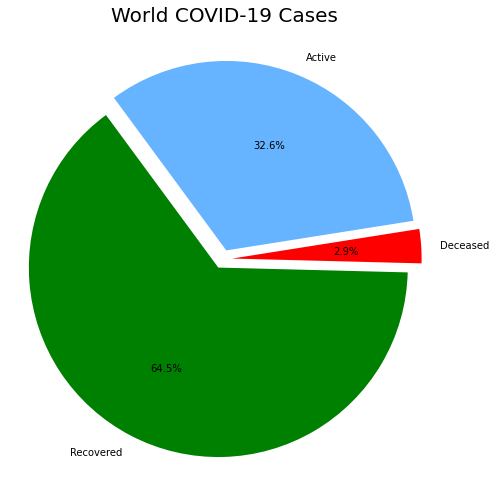

In [26]:
labels = ['Active','Recovered','Deceased']
sizes = [world_active['9/21/20'],world_recovered['9/21/20'],world_death['9/21/20']]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
    
    
    
plt.figure(figsize= (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
#centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()




    



In [27]:
# plotting country wise cases on world map 

In [28]:
countrywise_confirmed_df = confirmed_df.loc[:,['Country/Region','9/21/20']]
countrywise_confirmed_df = countrywise_confirmed_df.rename(columns ={'9/21/20': 'Confirmed'},inplace = False)
countrywise_confirmed_df

Country/Region  Confirmed
0           Afghanistan      39074
1               Albania      12535
2               Algeria      50023
3               Andorra       1681
4                Angola       4117
..                  ...        ...
261  West Bank and Gaza      36151
262      Western Sahara         10
263               Yemen       2028
264              Zambia      14175
265            Zimbabwe       7683

[266 rows x 2 columns]

In [29]:
countrywise_death_df = death_df.loc[:,['Country/Region','9/21/20']]
countrywise_death_df = countrywise_death_df.rename(columns ={'9/21/20': 'Death'},inplace = False)
countrywise_death_df

Country/Region  Death
0           Afghanistan   1444
1               Albania    364
2               Algeria   1679
3               Andorra     53
4                Angola    154
..                  ...    ...
261  West Bank and Gaza    265
262      Western Sahara      1
263               Yemen    586
264              Zambia    331
265            Zimbabwe    225

[266 rows x 2 columns]

In [30]:
countrywise_recovered_df = recovered_df.loc[:,['Country/Region','9/21/20']]
countrywise_recovered_df = countrywise_recovered_df.rename(columns ={'9/21/20': 'Recovered'},inplace = False)
countrywise_recovered_df

Country/Region  Recovered
0           Afghanistan      32576
1               Albania       6995
2               Algeria      35180
3               Andorra       1199
4                Angola       1449
..                  ...        ...
248  West Bank and Gaza      24428
249      Western Sahara          8
250               Yemen       1235
251              Zambia      13629
252            Zimbabwe       5924

[253 rows x 2 columns]

In [31]:
countrywise_df = pd.merge(pd.merge(countrywise_confirmed_df,countrywise_death_df,on='Country/Region',how='left'),countrywise_recovered_df,on='Country/Region',how='left')

In [32]:
countrywise_df

Country/Region  Confirmed  Death  Recovered
0             Afghanistan      39074   1444      32576
1                 Albania      12535    364       6995
2                 Algeria      50023   1679      35180
3                 Andorra       1681     53       1199
4                  Angola       4117    154       1449
...                   ...        ...    ...        ...
39635  West Bank and Gaza      36151    265      24428
39636      Western Sahara         10      1          8
39637               Yemen       2028    586       1235
39638              Zambia      14175    331      13629
39639            Zimbabwe       7683    225       5924

[39640 rows x 4 columns]

In [33]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
     
    fig.show()

In [36]:
plot_map(countrywise_df, 'Confirmed', 'matter')

In [35]:
plot_map(countrywise_df, 'Death', 'matter')

##### daywise confirmed cases across the world

In [41]:
confirmed_df_TS = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
confirmed_df_TS_summation = confirmed_df_TS.sum()
confirmed_df_TS_summation

1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
9/17/20    30175313
9/18/20    30499534
9/19/20    30780755
9/20/20    31021972
9/21/20    31245797
Length: 244, dtype: int64

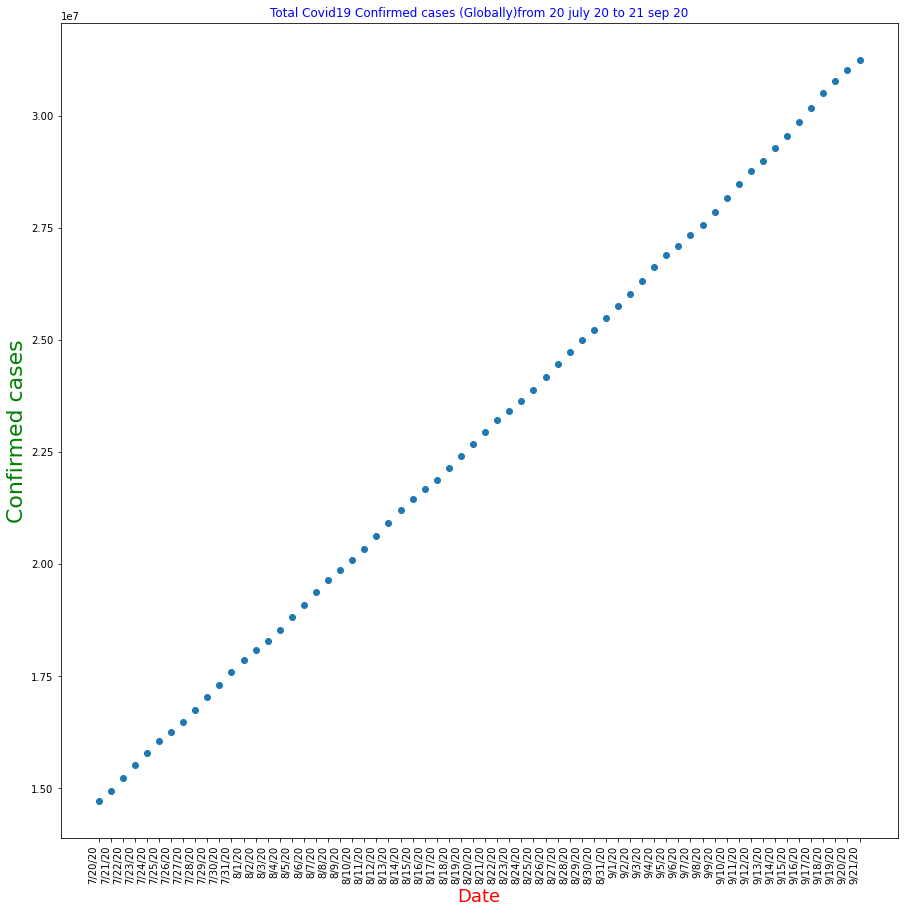

In [42]:
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15,15 # first one width second height
plt.xticks(rotation=90, ha='right')
plt.xlabel('Date', fontsize=18, color='red')
plt.ylabel('Confirmed cases', fontsize=22, color='green')
plt.title('Total Covid19 Confirmed cases (Globally)from 20 july 20 to 21 sep 20', color='blue')
plt.scatter(confirmed_df_TS_summation.index[180:],confirmed_df_TS_summation.values[180:])

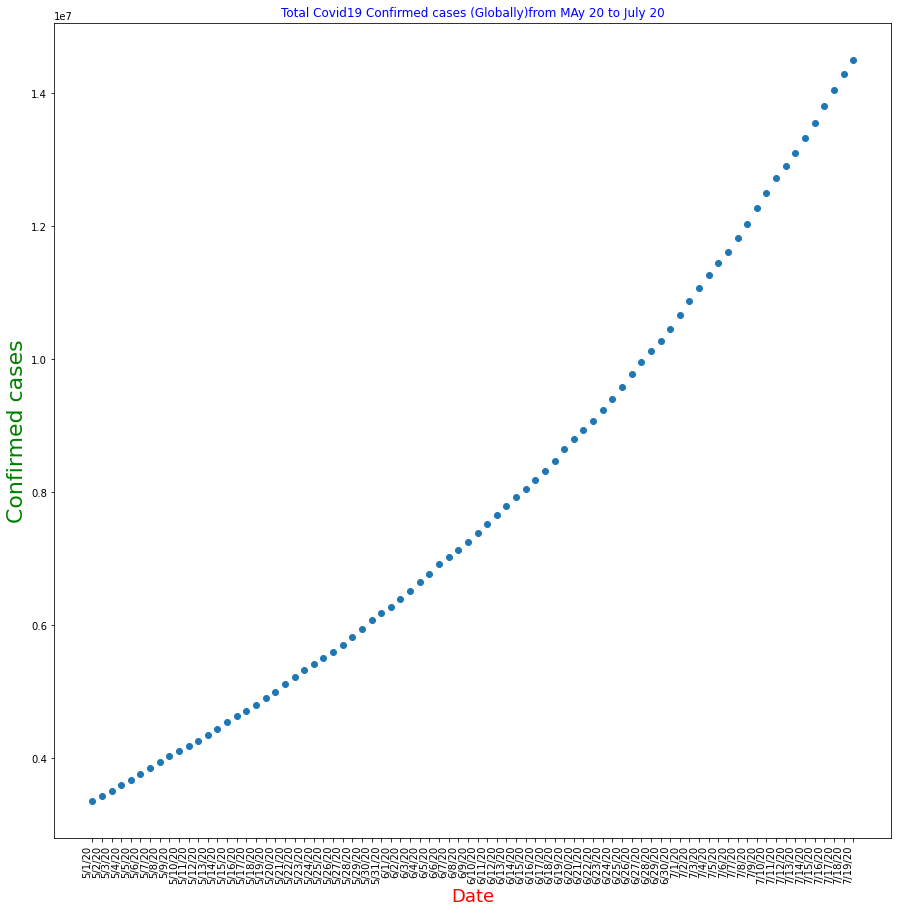

In [43]:
plt.xticks(rotation=90, ha='right')
plt.xlabel('Date', fontsize=18, color='red')
plt.ylabel('Confirmed cases', fontsize=22, color='green')
plt.title('Total Covid19 Confirmed cases (Globally)from MAy 20 to July 20', color='blue')
plt.scatter(confirmed_df_TS_summation.index[100:180],confirmed_df_TS_summation.values[100:180])

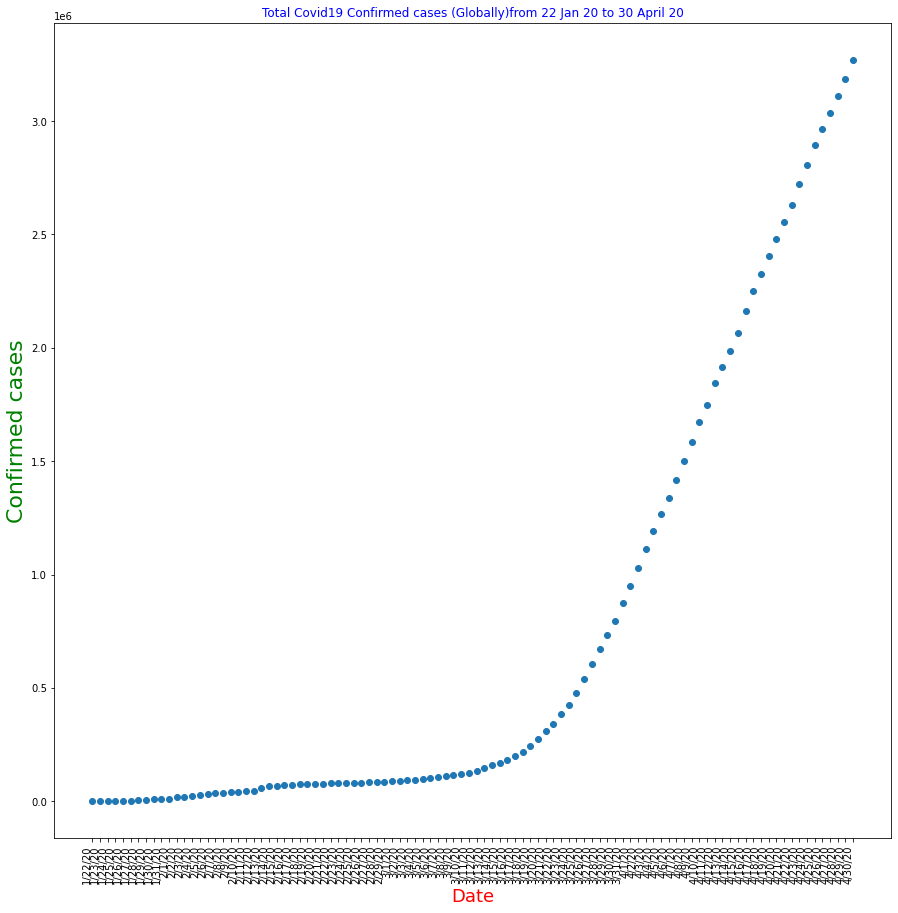

In [44]:
plt.xticks(rotation=90, ha='right')
plt.xlabel('Date', fontsize=18, color='red')
plt.ylabel('Confirmed cases', fontsize=22, color='green')
plt.title('Total Covid19 Confirmed cases (Globally)from 22 Jan 20 to 30 April 20', color='blue')
plt.scatter(confirmed_df_TS_summation.index[:100],confirmed_df_TS_summation.values[:100])